# Digital image and signal processing

## Exercise 3

The aim of the exercise is to observe the spectrum of the ECG signal.

### Authors

- Kinga Marek
- Mariusz Wiśniewski

### Task 1  

Read in the signal *ecg100.txt* and visually evaluate it on the chart.

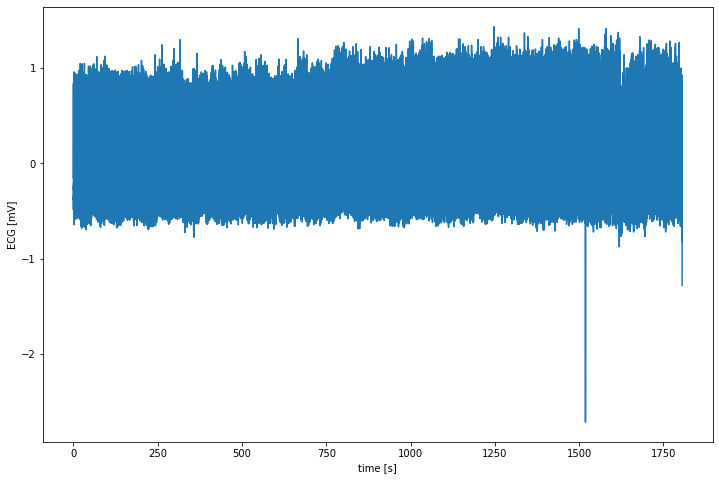

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fs = 360

data = np.loadtxt('../data/ekg100.txt')
time = np.arange(len(data)) / fs

plt.rcParams['figure.figsize'] = [12, 8]
plt.plot(time, data)
plt.xlabel('time [s]')
plt.ylabel('ECG [mV]')
plt.show()

### Task 2 

Determine its discrete Fourier transform and present the amplitude spectrum of the signal as a function of frequency in the range [0, *fs* / 2], where *fs* is the sampling frequency.

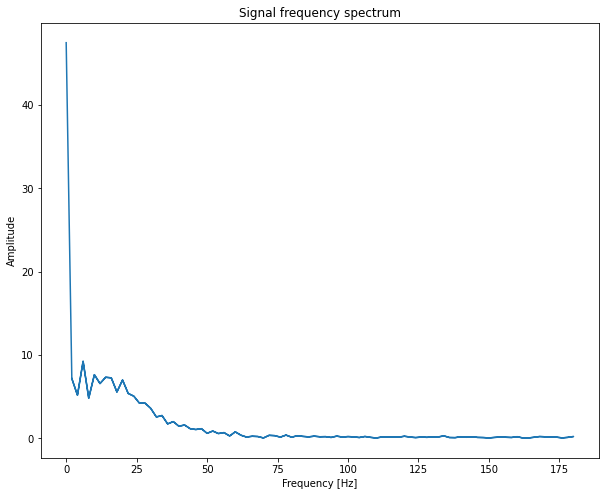

In [2]:
fft_freq = np.abs(np.fft.fftfreq(int(fs/2), 1/fs))
fft_amplitude = np.abs(np.fft.fft(data, len(fft_freq)))

plt.rcParams['figure.figsize'] = [10, 8]
plt.plot(fft_freq, fft_amplitude)
plt.title('Signal frequency spectrum')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.show()

### Task 3 

Find the inverse discrete Fourier transform of the sequence determined in [task 2](#task-2) and compare the obtained sequence of samples with the original signal *ecg100* (the difference of the signals can be determined).

Text(0, 0.5, 'Amplitude')

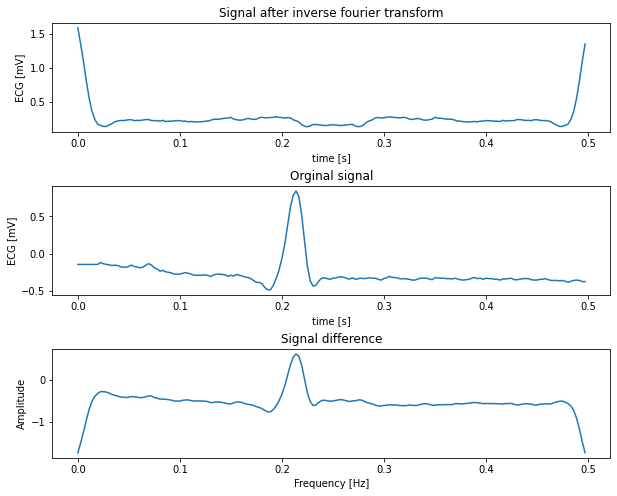

In [3]:
inv_ekg = np.fft.ifft(fft_amplitude).real

plt.subplots_adjust(hspace=0.5)
plt.rcParams['figure.figsize'] = [8, 15]

plt.subplot(311)
plt.plot(time[:len(inv_ekg)], inv_ekg)
plt.title('Signal after inverse fourier transform')
plt.xlabel('time [s]')
plt.ylabel('ECG [mV]')

plt.subplot(312)
plt.plot(time[:len(inv_ekg)], data[:len(inv_ekg)])
plt.title('Orginal signal')
plt.xlabel('time [s]')
plt.ylabel('ECG [mV]')

signal_difference = [data[index] - inv_ekg[index]
                     for index in range(len(inv_ekg))]

plt.subplot(313)
plt.plot(time[:len(inv_ekg)], signal_difference[:len(inv_ekg)])
plt.title('Signal difference')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')